In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from collections import Counter

In [3]:
def check_stability_and_plot(numerator_coeffs, denominator_coeffs):
    # Create transfer function
    sys = signal.TransferFunction(numerator_coeffs, denominator_coeffs)

    # Compute poles
    poles = sys.poles

    # Check conditions for stability
    if np.any(poles.real > 0):
        print("The system is unstable (condition 2)")
        return
    if np.any(Counter(poles.imag) > 1):
        print("The system is unstable (condition 3)")
        return
    if np.any((poles.real == 0) & (Counter(poles.imag) == 1)):
        print("The system is marginally stable (condition 4)")
        return

    print("The system is stable (condition 1)")

    # Plot poles
    plt.figure()
    plt.plot(poles.real, poles.imag, 'x')
    plt.title('Pole-Zero Plot')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.grid(True)
    plt.show()

# Test the function with your system's coefficients
numerator_coeffs = [1, 0.5]  # Coefficients of N(z)
denominator_coeffs = [1, -0.8, 0.2]  # Coefficients of D(z)
check_stability_and_plot(numerator_coeffs, denominator_coeffs)

The system is unstable (condition 2)


System a:


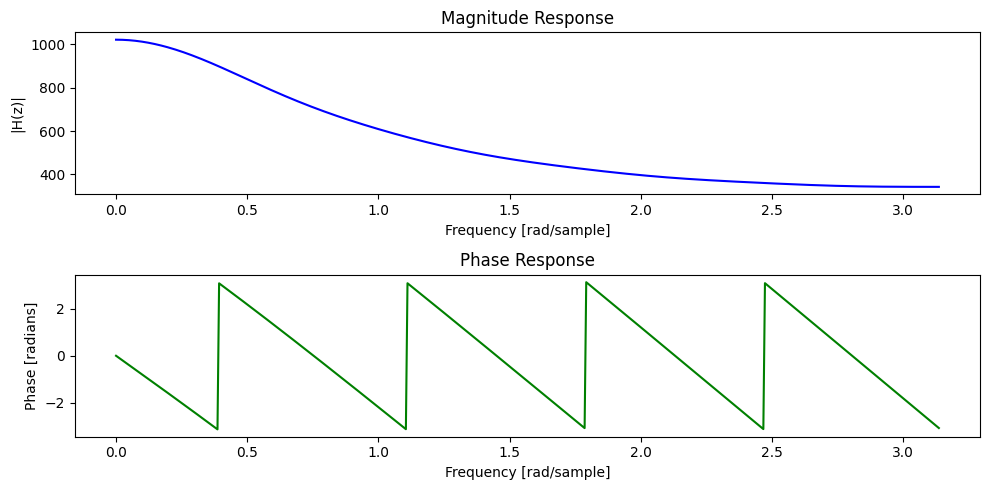

Poles: [ 1.53208889+1.28557522j  1.53208889-1.28557522j  0.34729636+1.96961551j
  0.34729636-1.96961551j -1.87938524+0.68404029j -1.87938524-0.68404029j
 -1.        +1.73205081j -1.        -1.73205081j]
Unstable
Non-causal
System b:


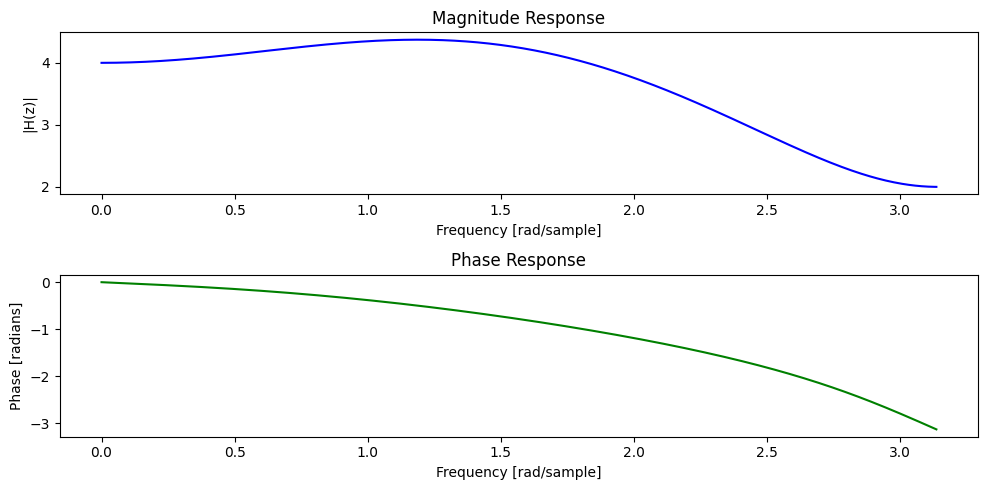

Poles: [-1.78077641  0.28077641  0.          0.          0.          0.
  0.          0.          0.          0.        ]
Unstable
Non-causal
System c:


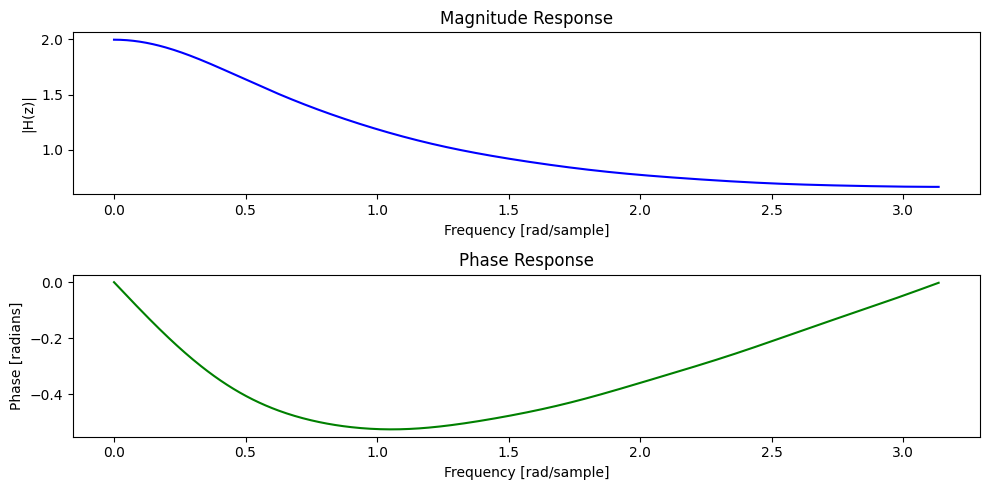

Poles: [-0.5      +0.j         -0.4045085+0.29389263j -0.4045085-0.29389263j
  0.4045085+0.29389263j  0.4045085-0.29389263j  0.1545085+0.47552826j
  0.1545085-0.47552826j -0.1545085+0.47552826j -0.1545085-0.47552826j]
Stable
Non-causal
System d:


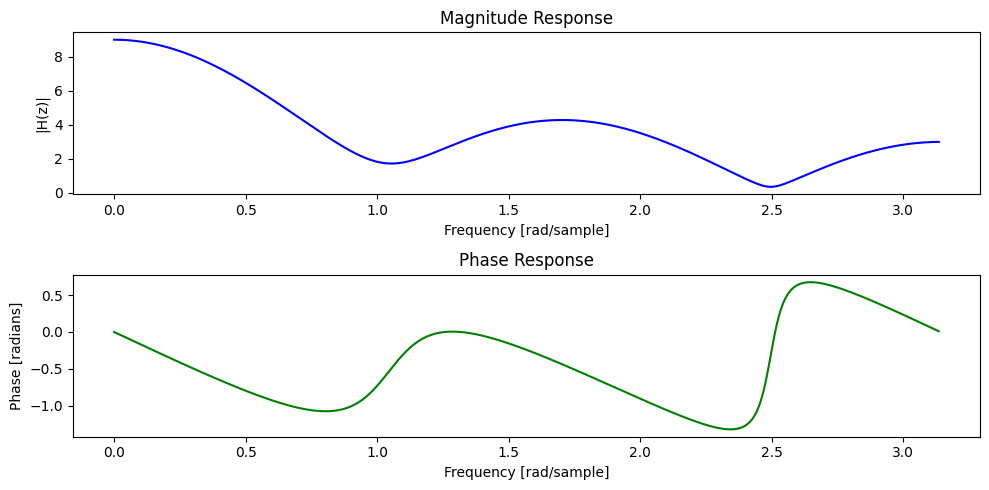

Poles: [-0.76261924+0.5742251j  -0.76261924-0.5742251j   0.42928591+0.73976425j
  0.42928591-0.73976425j]
Stable
Non-causal
System e:


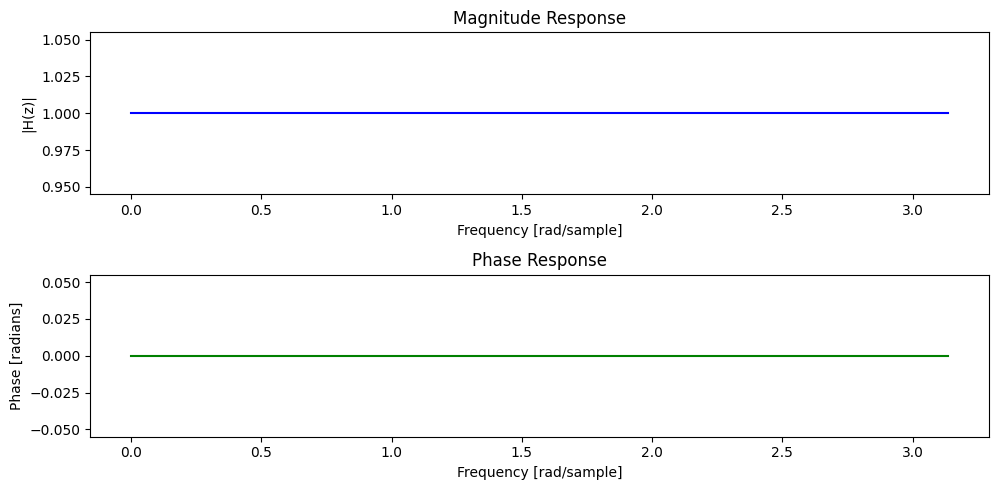

Poles: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Stable
Non-causal


In [12]:
def plot_system_properties(h_n):
    # Z-transform
    z, Hz = signal.freqz(h_n)

    # Plot magnitude and phase response
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(z, np.abs(Hz), 'b')
    plt.title('Magnitude Response')
    plt.xlabel('Frequency [rad/sample]')
    plt.ylabel('|H(z)|')

    plt.subplot(2, 1, 2)
    plt.plot(z, np.angle(Hz), 'g')
    plt.title('Phase Response')
    plt.xlabel('Frequency [rad/sample]')
    plt.ylabel('Phase [radians]')
    plt.tight_layout()
    plt.show()

    # Poles
    poles = np.roots(h_n)
    print("Poles:", poles)

    # Stability
    if np.all(np.abs(poles) < 1):
        print("Stable")
    else:
        print("Unstable")

    # Causality
    if np.all(poles.real > 0):
        print("Causal")
    else:
        print("Non-causal")

# a. ℎ[𝑛] = (2^n)(𝑢[𝑛 − 1])
n_a = np.arange(0, 10)
h_n_a = (2 ** n_a) * (np.heaviside(n_a - 1, 1))
print("System a:")
plot_system_properties(h_n_a)

# b. 𝑦[𝑛] = 2𝑥[𝑛 + 1] + 3𝑥[𝑛] − 𝑥[𝑛 − 1]
n_b = np.arange(-5, 6)
h_n_b = [2, 3, -1, 0, 0, 0, 0, 0, 0, 0, 0]
print("System b:")
plot_system_properties(h_n_b)

# c. ℎ[𝑛] = ((0.5)^𝑛)𝑢[𝑛]
n_c = np.arange(0, 10)
h_n_c = (0.5 ** n_c) * (np.heaviside(n_c, 1))
print("System c:")
plot_system_properties(h_n_c)

# d. ℎ[𝑛] = {3, 2, 1, 1, 2}; nx = 2
h_n_d = [3, 2, 1, 1, 2]
print("System d:")
plot_system_properties(h_n_d)

# e. ℎ[𝑛] = ((− 0.5)^𝑛)𝑢[− 𝑛]
n_e = np.arange(0, 10)
h_n_e = ((-0.5) ** n_e) * (np.heaviside(-n_e, 1))
print("System e:")
plot_system_properties(h_n_e)

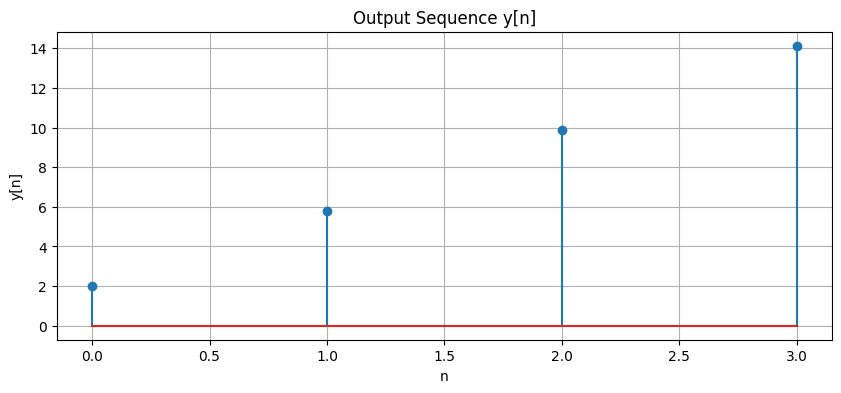

[2.0, 5.8, 9.88, 14.128]


In [4]:
def iir_system(x):
    y = [0] * len(x)  # Initialize y with zeros, same length as x
    for n in range(len(x)):
        x_n_1 = x[n-1] if n-1 >= 0 else 0  # Get x[n-1] if exists, else use 0
        y_n_1 = y[n-1] if n-1 >= 0 else 0  # Get y[n-1] if exists, else use 0
        
        # Implementing the equation: y[n]=x[n]+0.8*x[n-1]+0.6*y[n-1]
        y[n] = x[n] + (0.8 * x_n_1) + (0.6 * y_n_1)
        
    return y

# Test with a sample input sequence
x = [2,3,4,5]
y = iir_system(x)

# Plotting the output sequence
plt.figure(figsize=(10, 4))
plt.stem(range(len(y)), y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Output Sequence y[n]')
plt.grid(True)
plt.show()

# Test with a sample input sequence
x = [2,3,4,5]
y = iir_system(x)
print(y)